<a href="https://colab.research.google.com/github/RajKGupta/swaggy/blob/master/swaggy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [3]:
!wget https://www.dropbox.com/s/czes6glwu8hgmq7/swaggy.zip

--2019-04-11 11:35:04--  https://www.dropbox.com/s/czes6glwu8hgmq7/swaggy.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.1, 2620:100:601b:1::a27d:801
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/czes6glwu8hgmq7/swaggy.zip [following]
--2019-04-11 11:35:04--  https://www.dropbox.com/s/raw/czes6glwu8hgmq7/swaggy.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc92d700b4d32dfa999f99893726.dl.dropboxusercontent.com/cd/0/inline/AewON2r5DSo2JDaAsvcxNpGbNW2OfxEM8GqfQUcWGltv03EI0QnGkWY8AZSJq2x0j7RP-GObs0rPGOXbDtwq28ILWRuK3Nx0iXj0_9vg7xH1Tw/file# [following]
--2019-04-11 11:35:04--  https://uc92d700b4d32dfa999f99893726.dl.dropboxusercontent.com/cd/0/inline/AewON2r5DSo2JDaAsvcxNpGbNW2OfxEM8GqfQUcWGltv03EI0QnGkWY8AZSJq2x0j7RP-GObs0rPGOXbDtwq28ILWRuK3Nx0iXj0_9vg7xH1Tw/file
Resolving uc92d700b4d32df

In [5]:
!ls

sample_data  swaggy.zip


In [6]:
!unzip swaggy.zip

Archive:  swaggy.zip
   creating: swaggy/train/
   creating: swaggy/train/apple_pie/
  inflating: swaggy/train/apple_pie/1005649.jpg  
  inflating: swaggy/train/apple_pie/1011328.jpg  
  inflating: swaggy/train/apple_pie/1014775.jpg  
  inflating: swaggy/train/apple_pie/1026328.jpg  
  inflating: swaggy/train/apple_pie/1028787.jpg  
  inflating: swaggy/train/apple_pie/1034399.jpg  
  inflating: swaggy/train/apple_pie/1038694.jpg  
  inflating: swaggy/train/apple_pie/1043283.jpg  
  inflating: swaggy/train/apple_pie/1047447.jpg  
  inflating: swaggy/train/apple_pie/1057749.jpg  
  inflating: swaggy/train/apple_pie/1057810.jpg  
  inflating: swaggy/train/apple_pie/1068632.jpg  
  inflating: swaggy/train/apple_pie/1072416.jpg  
  inflating: swaggy/train/apple_pie/1074856.jpg  
  inflating: swaggy/train/apple_pie/1076891.jpg  
  inflating: swaggy/train/apple_pie/1077610.jpg  
  inflating: swaggy/train/apple_pie/1088809.jpg  
  inflating: swaggy/train/apple_pie/1097378.jpg  
  inflating: sw

In [0]:
PATH=f'swaggy/'
bs=32
tfms = get_transforms(do_flip=True,max_rotate=25) 
data = ImageDataBunch.from_folder(PATH, ds_tfms=tfms, size=224,train='train',valid = 'valid',bs=bs)

In [15]:
data.classes

['apple_pie',
 'baby_back_ribs',
 'breakfast_burrito',
 'carrot_cake',
 'cheesecake',
 'chicken_wings',
 'chocolate_cake',
 'french_fries',
 'grilled_cheese_sandwich',
 'hot_dog',
 'macaroni_and_cheese',
 'omelette',
 'pancakes',
 'pizza',
 'samosa',
 'spring_rolls',
 'tacos',
 'waffles']

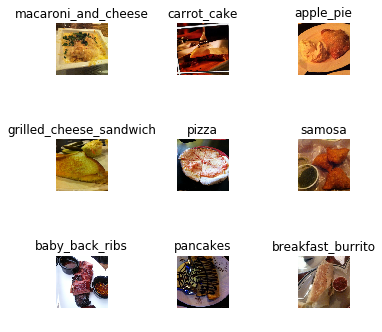

In [12]:
data.show_batch(rows=3, figsize=(5,5))

In [16]:
learn = create_cnn(data, models.resnet18, metrics=accuracy,ps=[0.25,0.30])

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:105: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


In [18]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.884872,0.677889,0.801111,05:26
1,0.868401,0.648832,0.803333,05:36
2,0.798510,0.620476,0.818889,05:24
3,0.676139,0.592662,0.820000,05:28


In [0]:
learn.save('stage-1')

In [21]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (15572 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
cheesecake,cheesecake,cheesecake,cheesecake,cheesecake
Path: swaggy;

Valid: LabelList (900 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
cheesecake,cheesecake,cheesecake,cheesecake,cheesecake
Path: swaggy;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, 

In [22]:
data = ImageDataBunch.from_folder(PATH, ds_tfms=tfms, size=224,train='train',valid = 'valid',bs=bs*2)
learn.data = data

learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.667578,0.596832,0.815556,05:32
1,0.698526,0.622805,0.814444,05:26
2,0.617831,0.574191,0.821111,05:27
3,0.573457,0.566409,0.827778,05:30


In [0]:
learn.save('stage-2')

In [25]:
tfms = get_transforms() 
data = ImageDataBunch.from_folder(PATH, ds_tfms=tfms, size=224,train='train',valid = 'valid',bs=bs*4)
learn.data = data
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.521020,0.563384,0.836667,05:18
1,0.542556,0.555629,0.826667,05:20
2,0.488377,0.536072,0.837778,05:15
3,0.446025,0.541384,0.844444,05:16


In [26]:
preds,y = learn.TTA(ds_type=DatasetType.Valid) 

In [27]:
preds[:5]

tensor([[7.9198e-02, 1.0925e-03, 3.6259e-04, 8.5089e-01, 4.0800e-03, 1.7083e-04,
         5.7742e-03, 5.9434e-06, 2.8134e-04, 1.2277e-05, 5.5457e-02, 6.9749e-04,
         2.3672e-04, 1.1053e-03, 2.8377e-04, 1.6451e-04, 1.6543e-04, 2.7189e-05],
        [5.6690e-03, 6.2312e-04, 1.4861e-03, 1.4289e-01, 7.9297e-01, 5.5015e-04,
         2.1247e-02, 6.2524e-04, 1.3033e-02, 3.1830e-03, 7.9450e-04, 9.5894e-03,
         4.6271e-04, 1.0253e-03, 1.0641e-03, 1.7300e-03, 2.7487e-03, 3.0899e-04],
        [2.5475e-03, 1.7352e-04, 5.4848e-04, 1.6405e-02, 9.2221e-01, 6.0598e-04,
         4.0195e-02, 9.4109e-04, 1.2565e-03, 3.2868e-03, 2.3073e-04, 6.9884e-04,
         4.7739e-03, 9.2103e-05, 1.5258e-05, 2.8989e-05, 3.6145e-03, 2.3785e-03],
        [5.9636e-02, 1.3496e-03, 2.6457e-02, 1.8637e-01, 4.1050e-01, 4.5877e-04,
         2.0533e-01, 2.3952e-03, 6.2744e-03, 9.8418e-03, 4.9397e-04, 1.2505e-02,
         3.8354e-02, 1.1467e-03, 1.1988e-03, 1.7727e-03, 2.3368e-02, 1.2545e-02],
        [1.7367e-03, 2.0

In [28]:
y[:5]

tensor([4, 4, 4, 4, 4])

In [0]:
a = np.array(np.argmax(preds,axis=1))
b = np.array(y)

In [36]:
a.shape

(900,)

In [37]:
b.shape

(900,)

In [39]:
accuracy(preds,y)

tensor(0.8678)

In [0]:
learn.export()

In [41]:
from google.colab import files

files.download('./swaggy/export.pkl')

KeyboardInterrupt: ignored